In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
file_name = "parkingData.csv"
dataFrame = pd.read_csv(file_name)

In [24]:
dataFrame['Time Stamp'] = pd.to_datetime(dataFrame['Time Stamp'])

In [25]:
dataFrame.set_index('Time Stamp', inplace=True)

In [26]:
resampled_dataFreame = dataFrame.resample('10S' ).mean()

In [27]:
print(resampled_dataFreame)

                     Number of cars
Time Stamp                         
2024-07-03 22:40:00             0.0
2024-07-03 22:40:10             0.0
2024-07-03 22:40:20             0.0
2024-07-03 22:40:30             0.0
2024-07-03 22:40:40             0.0
2024-07-03 22:40:50             0.0
2024-07-03 22:41:00             0.0
2024-07-03 22:41:10             0.0
2024-07-03 22:41:20             0.0
2024-07-03 22:41:30             0.0
2024-07-03 22:41:40             0.0
2024-07-03 22:41:50             0.0
2024-07-03 22:42:00             0.0
2024-07-03 22:42:10             0.0
2024-07-03 22:42:20             0.0
2024-07-03 22:42:30             0.0
2024-07-03 22:42:40             0.0
2024-07-03 22:42:50             0.0
2024-07-03 22:43:00             0.0
2024-07-03 22:43:10             0.0
2024-07-03 22:43:20             0.0
2024-07-03 22:43:30             0.0
2024-07-03 22:43:40             0.0
2024-07-03 22:43:50             0.0
2024-07-03 22:44:00             0.0
2024-07-03 22:44:10         

In [28]:
resampled_dataFreame.replace(0, np.nan, inplace=True)

In [29]:
print(resampled_dataFreame)

                     Number of cars
Time Stamp                         
2024-07-03 22:40:00             NaN
2024-07-03 22:40:10             NaN
2024-07-03 22:40:20             NaN
2024-07-03 22:40:30             NaN
2024-07-03 22:40:40             NaN
2024-07-03 22:40:50             NaN
2024-07-03 22:41:00             NaN
2024-07-03 22:41:10             NaN
2024-07-03 22:41:20             NaN
2024-07-03 22:41:30             NaN
2024-07-03 22:41:40             NaN
2024-07-03 22:41:50             NaN
2024-07-03 22:42:00             NaN
2024-07-03 22:42:10             NaN
2024-07-03 22:42:20             NaN
2024-07-03 22:42:30             NaN
2024-07-03 22:42:40             NaN
2024-07-03 22:42:50             NaN
2024-07-03 22:43:00             NaN
2024-07-03 22:43:10             NaN
2024-07-03 22:43:20             NaN
2024-07-03 22:43:30             NaN
2024-07-03 22:43:40             NaN
2024-07-03 22:43:50             NaN
2024-07-03 22:44:00             NaN
2024-07-03 22:44:10         

In [30]:
mean_cars = resampled_dataFreame['Number of cars'].mean(skipna=True)
std_cars = resampled_dataFreame['Number of cars'].std(skipna=True)

In [31]:
threshold = 1  # Adjust this value to change sensitivity

peak_hours = resampled_dataFreame[resampled_dataFreame['Number of cars'] > (mean_cars + threshold * std_cars)]
min_hours = resampled_dataFreame[resampled_dataFreame['Number of cars'] < (mean_cars - threshold * std_cars)]

print("Peak Hours:\n", peak_hours)
print("Minimum Hours:\n", min_hours)

Peak Hours:
                      Number of cars
Time Stamp                         
2024-07-03 22:45:50             6.0
2024-07-03 22:46:00             6.0
2024-07-03 22:46:10             6.0
2024-07-03 22:46:20             6.0
2024-07-03 22:46:30             6.0
2024-07-03 22:46:40             6.0
Minimum Hours:
                      Number of cars
Time Stamp                         
2024-07-03 22:45:00             1.0
2024-07-03 22:45:10             2.0
2024-07-03 22:48:00             0.5
2024-07-03 22:48:10             1.0


In [33]:
print(resampled_dataFreame.columns)
print(peak_hours.columns)
print(min_hours.columns)

Index(['Number of cars'], dtype='object')
Index(['Number of cars'], dtype='object')
Index(['Number of cars'], dtype='object')


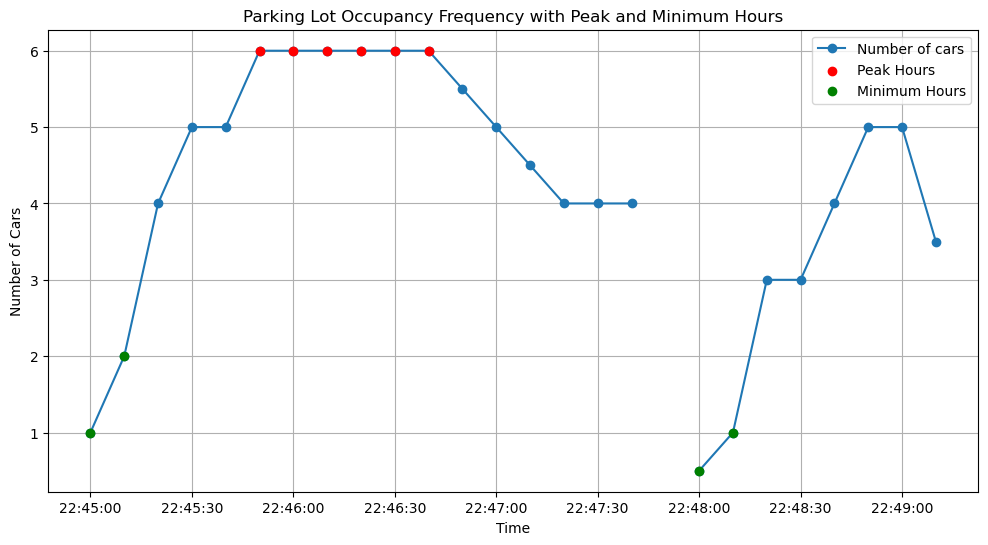

In [35]:
number_of_cars_column = 'Number of cars'
peak_hours_column = 'Number of cars'
min_hours_column = 'Number of cars'

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(resampled_dataFreame.index, resampled_dataFreame[number_of_cars_column], marker='o', label=number_of_cars_column)
plt.scatter(peak_hours.index, peak_hours[peak_hours_column], color='r', label='Peak Hours', zorder=5)
plt.scatter(min_hours.index, min_hours[min_hours_column], color='g', label='Minimum Hours', zorder=5)
plt.title('Parking Lot Occupancy Frequency with Peak and Minimum Hours')
plt.xlabel('Time')
plt.ylabel('Number of Cars')
plt.legend()
plt.grid(True)
plt.show()